# Classify 100 numbers into 5 Categories with Keras

by Ding

This notebook shows how to use a neural network for a (simple) classification problem.

We want machine to learn to classify [0, 0.2) into Class 0, [0.2, 0.4) into Class 1, [0.4, 0.6) into Class 2, [0.6, 0.8) into Class 3 and [0.8, 1) into Class 4.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
nums = np.arange(1, 101)
nums

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [3]:
nums_1 = nums.reshape(100, 1)

In [4]:
def normalize(x):
    x1 = x - min(x)
    x2 = max(x) - min(x)
    return x1/x2

nums_norm = normalize(nums_1) # Really need to normalize it?

In [5]:
labels = np.zeros([100,1])

labels[20:40] = 1
labels[40:60] = 2
labels[60:80] = 3
labels[80:100] = 4

In [6]:
x_train, x_test, y_train, y_test = train_test_split(nums_norm, labels, test_size=0.2)

In [7]:
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', input_shape=(1,)))
model.add(Dense(5, activation='softmax'))

In [8]:
model.compile(Adam(learning_rate=0.01), 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [10]:
y_cat = to_categorical(y_train)

<Figure size 576x432 with 0 Axes>

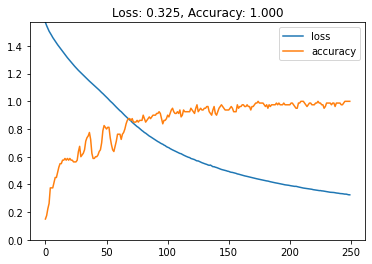

In [11]:
history = model.fit(x_train, y_cat, verbose=0, epochs=250)
plot_loss_accuracy(history)

In [12]:
def predict(x_test):
    x_test = x_test.tolist()
    ans = []
    for t in x_test:
      ans.append(t.index(max(t))) # Find the position (index) of the largest probability among the five predicted probabilities
    return ans

In [13]:
y_test_eva = y_test.reshape(-1)
print("Observation:")
print(y_test_eva)
print("Prediction:")
y_pred_eva = np.array(predict(model.predict(x_test)), dtype='float64')
print(y_pred_eva)

print("Accuracy:")
print(accuracy_score(y_pred_eva, y_test_eva))

Observation:
[3. 2. 3. 4. 2. 1. 4. 1. 3. 2. 2. 4. 4. 4. 4. 4. 1. 2. 4. 3.]
Prediction:
[3. 2. 3. 4. 2. 1. 4. 1. 3. 2. 2. 4. 4. 4. 3. 4. 1. 2. 4. 3.]
Accuracy:
0.95
